**Проект по SQL**

Цель:

Анализ базы данных, в которой находится информация о литературе. 

Причина: 

Данные помогут сформулировать ценностное предложение для нового продукта.

Задача:

Четкое следование поставленных в ТЗ задач по выгрузке данных.

- **Задача 1.** Оценка объемов выпускаемой литературы. Посчитайте, сколько книг вышло после 1 января 2000 года; 


- **Задача 2.** Определить запросы пользователя. Для каждой книги посчитайте количество обзоров и среднюю оценку;


- **Задача 3.** Определение самого популярного издательства. Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;


- **Задача 4.** Определение самого популярного автора. Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;


- **Задача 5.** Определение активности пользователей. Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

                                                    СХЕМА БАЗЫ ДАННЫХ
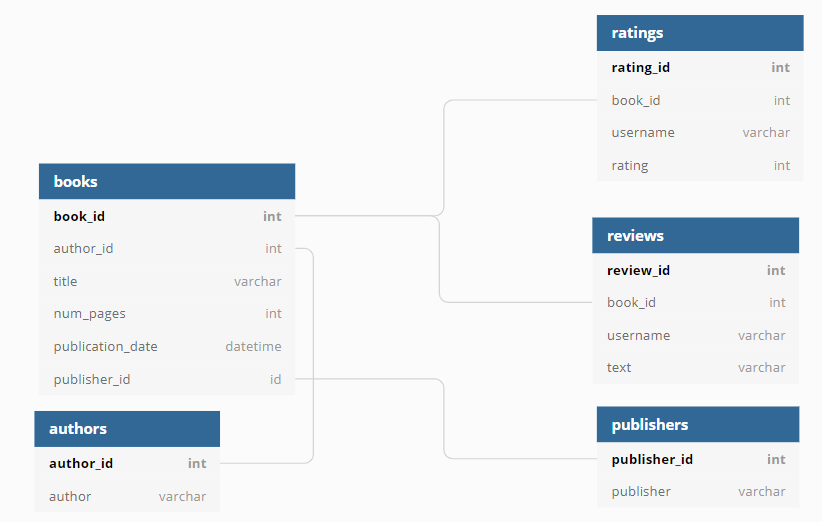

**Описание базы данных:**
___
Таблица **books**

Содержит данные о книгах:
- **book_id** — идентификатор книги;
- **author_id** — идентификатор автора;
- **title** — название книги;
- **num_pages** — количество страниц;
- **publication_date** — дата публикации книги;
- **publisher_id** — идентификатор издателя.
___
___
Таблица **authors**

Содержит данные об авторах:
- **author_id** — идентификатор автора;
- **author** — имя автора.
___
___
Таблица **publishers**

Содержит данные об издательствах:
- **publisher_id** — идентификатор издательства;
- **publisher** — название издательства;
___
___
Таблица **ratings**

Содержит данные о пользовательских оценках книг:

- **rating_id** — идентификатор оценки;
- **book_id** — идентификатор книги;
- **username** — имя пользователя, оставившего оценку;
- **rating** — оценка книги.
___
___
Таблица **reviews**

Содержит данные о пользовательских обзорах:
- **review_id** — идентификатор обзора;
- **book_id** — идентификатор книги;
- **username** — имя автора обзора;
- **text** — текст обзора.
___

In [1]:
# Импорт библиотек

import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [3]:
def request(query):
    return pd.io.sql.read_sql(query, con = engine)

In [4]:
#  books
books = '''SELECT *
           FROM books;
        '''
request(books).head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
#  authors
authors = '''SELECT *
             FROM authors;
          '''
request(authors).head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
#  publishers
publishers = '''SELECT *
                FROM publishers;
             '''
request(publishers).head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [7]:
#  ratings
ratings = '''SELECT *
             FROM ratings;
          '''
request(ratings).head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [8]:
#  reviews
reviews = '''SELECT *
             FROM reviews;
          '''
request(reviews).head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [9]:
# ячейка ревьюера: можно подсчитать количество строк сразу с использованием небольшой оконной функции:

pd.io.sql.read_sql('''
SELECT *,
       COUNT(*) OVER() AS table_size
FROM books 
LIMIT 1        
'''
, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id,table_size
0,1,546,'Salem's Lot,594,2005-11-01,93,1000


**Задание 1**

Посчитайте, сколько книг вышло после 1 января 2000 года

*коментарий: нет уточнения входит ли 1 января в задание или нет? предполагаю что нет*

In [10]:
query_1 = '''SELECT COUNT(title)
             FROM books
             WHERE publication_date > '2000-01-01';
          '''
request(query_1)

,count
0,819


Вывод: после 1 января 2000 года вышло 819 книг. 

**Задание 2**

Для каждой книги посчитайте количество обзоров и среднюю оценку

In [11]:
query_2 =  '''SELECT books.title, 
                     COUNT(DISTINCT(review_id)) as total_reviews, 
                     AVG(ratings.rating) as avg_rating
              FROM books
              LEFT JOIN reviews ON books.book_id = reviews.book_id
              LEFT JOIN ratings ON books.book_id = ratings.book_id
              GROUP BY books.book_id
              ORDER BY total_reviews DESC;
          '''
request(query_2)

,title,total_reviews,avg_rating
0,Twilight (Twilight #1),7,3.662500
1,Water for Elephants,6,3.977273
2,The Glass Castle,6,4.206897
3,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
4,The Curious Incident of the Dog in the Night-Time,6,4.081081
...,...,...,...
995,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
996,The Natural Way to Draw,0,3.000000
997,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000
998,Essential Tales and Poems,0,4.000000


Вывод:

Лучшие книги по количеству обзоров:
- Twilight (Twilight #1)	
- Water for Elephants
- The Glass Castle
- Harry Potter and the Prisoner of Azkaban (Harry Potter #3)		
- The Curious Incident of the Dog in the Night-Time

**Задание 3**

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [12]:
query_3 =  '''SELECT publishers.publisher,
                     COUNT(books.book_id) as books_total
              FROM books
              LEFT JOIN publishers ON books.publisher_id=publishers.publisher_id
              WHERE books.num_pages >= 50
              GROUP BY publishers.publisher
              ORDER BY books_total DESC
              LIMIT 1;
          '''
request(query_3)

,publisher,books_total
0,Penguin Books,42


Вывод: издательство, которое выпустило больше всего книг толще 50 страниц - Penguin Books. Всего выпущено 42 книги этим издательством.

**Задание 4**

Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [16]:
query_4 = '''SELECT author, 
             AVG(temp.avg_rating) AS average_rating,
             COUNT(temp.book_id) AS books_total
             FROM  (SELECT author, 
                           books.book_id, 
                           AVG(rating) AS avg_rating
                    FROM authors
                    LEFT JOIN books ON books.author_id = authors.author_id
                    LEFT JOIN ratings ON ratings.book_id = books.book_id
                    GROUP BY author, books.book_id
                    HAVING COUNT(rating) > 50) AS temp
            GROUP BY author
            ORDER BY average_rating DESC
            LIMIT 1
           
           
        '''
request(query_4)

,author,average_rating,books_total
0,J.K. Rowling/Mary GrandPré,4.283844,4


Вывод: автор с самой высокой средней оценкой книг - J.K. Rowling/Mary GrandPré - средняя оценка 4.28.

**Задание 5**

Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [14]:
query_5 =  '''SELECT ROUND(AVG(total_reviews))
              FROM  (
                     SELECT reviews.username,
                            COUNT(reviews.review_id) AS total_reviews
                     FROM reviews
                     WHERE reviews.username IN  (
                                                 SELECT ratings.username
                                                 FROM ratings
                                                 GROUP BY ratings.username
                                                 HAVING COUNT(ratings.rating) > 50
                                                )
                     GROUP BY reviews.username
                    ) AS reviews_count;
            '''
request(query_5)

,round
0,24.0


Вывод: среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24 обзора.

**Общий вывод**
1. После 1 января 2000 года вышло 819 книг.
2. Определили количество обзоров и среднюю оценку для каждой книги. Самыми обозреваемыми стали:
- Twilight (Twilight #1)	
- Water for Elephants
- The Glass Castle
- Harry Potter and the Prisoner of Azkaban (Harry Potter #3)		
- The Curious Incident of the Dog in the Night-Time
3. Больше всего книг выпустило издательство Penguin Books.
4. Автор с самой высокой средней оценкой книг (книги которого с 50 и более оценками) стал J.K. Rowling/Mary GrandPré, рейтинг 4.28
5. Среднее количество обзоров от пользователей, которые поставили больше 50 оценок составило 24 обзора.